In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.utils.data as Data

In [2]:
# ========== 人工构造数据集 ==========

num_inputs = 2
num_examples = 1000

n_data = torch.ones(num_examples, 2) #正负样本各50个，维度都是2
x1 = torch.normal(2 * n_data, 1) #负样本特征 shape=(50, 2)
y1 = torch.zeros(num_examples) # 标签：类型0（代表负例） shape=(50, 1)
x2 = torch.normal(-2 * n_data, 1) #正样本特征 shape=(50, 2)
y2 = torch.ones(num_examples) #标签：类型1（代表正例） shape=(50, 1)

x = torch.cat((x1, x2), 0).type(torch.FloatTensor)
y = torch.cat((y1, y2), 0).type(torch.FloatTensor)

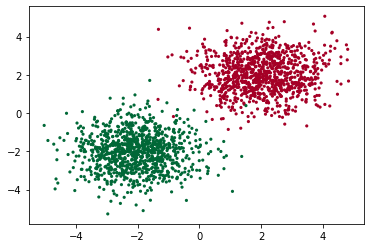

In [3]:
# ========== 数据集可视化 ==========

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=10, lw=0,cmap='RdYlGn')
plt.show()

In [4]:
# ========== 读取数据 ==========

lr = 0.03
batch_size = 50

# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(x, y)
# 把 dataset 放入 DataLoader
data_iter = Data.DataLoader(
    dataset=dataset, # torch TensorDataset format
    batch_size=batch_size, # mini batch size
    shuffle=True, # 是否打乱数据 (训练集一般需要进行打乱)
    num_workers=0, # 多线程来读数据，注意在Windows下需要设置为0
)

In [5]:
# ========== 构建模型 ==========

class LinearNet(torch.nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = torch.nn.Linear(n_feature, 1)
        
# forward 定义前向传播
    def forward(self, x):
        y = self.linear(x)
        return y

net = LinearNet(num_inputs) #样本维度

# net = torch.nn.Sequential(
#     torch.nn.Linear(num_inputs, 1)   # nn.Linear(input_size, output_size)
# )

In [6]:
# ========== 模型参数初始化 ==========

# from torch.nn import init

# init.normal_(net[0].weight, mean=0, std=0.01)
# init.constant_(net[0].bias, val=0) #也可以直接修改bias的data：net[0].bias.data.fill_(0)

In [7]:
# ========== 损失函数和优化 ==========

loss = torch.nn.BCEWithLogitsLoss()

import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.03)
#print(optimizer)

In [8]:
# ========== 模型训练 ==========

num_epochs = 200  #设置迭代次数
cost = [] #loss的集合
acc_re = [] #acc的集合

for epoch in range(1, num_epochs + 1):
    acc = 0
    for X, Y in data_iter:
        output = net(X)   #X是特征，y是标签
        l = loss(output, Y.view(-1, 1))
        optimizer.zero_grad()  # 梯度清零，等价于net.zero_grad()
        l.backward()
        optimizer.step()
    cost.append(l.data.numpy())
    mask = output.ge(0.5).float()
    correct = (mask[:, 0] == Y).sum()  # 计算正确预测的样本个数
    acc = correct.item() / Y.size(0)  # 计算精度
    acc_re.append(acc)
    if( epoch < 10 ):
        print('epoch %d, loss: %f, acc: %f' % (epoch, l.item(), acc))
    if( epoch % 10 == 0 ):
        print('epoch %d, loss: %f, acc: %f' % (epoch, l.item(), acc))

epoch 1, loss: 0.090732, acc: 0.980000
epoch 2, loss: 0.114909, acc: 0.980000
epoch 3, loss: 0.078730, acc: 0.980000
epoch 4, loss: 0.041895, acc: 1.000000
epoch 5, loss: 0.031241, acc: 1.000000
epoch 6, loss: 0.036793, acc: 1.000000
epoch 7, loss: 0.064347, acc: 0.980000
epoch 8, loss: 0.049691, acc: 0.980000
epoch 9, loss: 0.022093, acc: 1.000000
epoch 10, loss: 0.022935, acc: 1.000000
epoch 20, loss: 0.032237, acc: 0.980000
epoch 30, loss: 0.013763, acc: 1.000000
epoch 40, loss: 0.010487, acc: 1.000000
epoch 50, loss: 0.012805, acc: 1.000000
epoch 60, loss: 0.007211, acc: 1.000000
epoch 70, loss: 0.043710, acc: 0.960000
epoch 80, loss: 0.013834, acc: 1.000000
epoch 90, loss: 0.006157, acc: 1.000000
epoch 100, loss: 0.011335, acc: 1.000000
epoch 110, loss: 0.003335, acc: 1.000000
epoch 120, loss: 0.005084, acc: 1.000000
epoch 130, loss: 0.002419, acc: 1.000000
epoch 140, loss: 0.005129, acc: 1.000000
epoch 150, loss: 0.002148, acc: 1.000000
epoch 160, loss: 0.004750, acc: 1.000000
ep

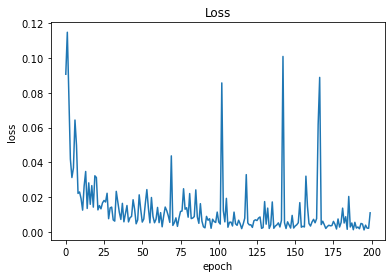

In [9]:
# ========== 损失函数可视化 ==========

plt.plot(cost)
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title('Loss')
plt.show()

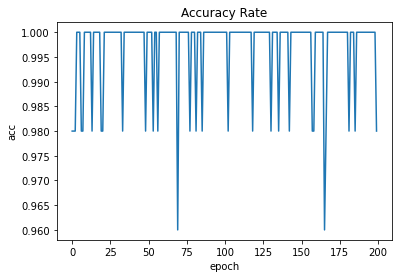

In [10]:
# ========== 准确率可视化 ==========

plt.plot(acc_re)
plt.ylabel("acc")
plt.xlabel("epoch")
plt.title('Accuracy Rate')
plt.show()

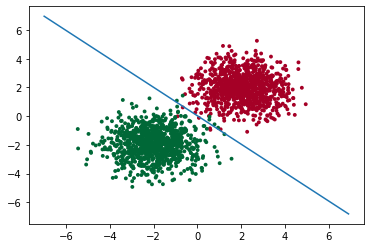

In [12]:
# ========== 结果可视化 ==========

w0,w1 = net.linear.weight[0]
w0 = float(w0.item())
w1 = float(w1.item())
b = float(net.linear.bias.item())
plot_x = np.arange(-7, 7, 0.1)
plot_y = (-w0 * plot_x - b) / w1
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=15, lw=0,cmap='RdYlGn')
plt.plot(plot_x, plot_y)
plt.show()